## Introduction

The roots of pandas lay in analyzing financial time series data. Time series are points of data
gathered over time. Generally, the time is evenly spaced between each data point. However,
there may be gaps in the observations. pandas includes functionality to manipulate dates,
aggregate over different time periods, sample different periods of time, and more.

## Understanding the difference between python and pandas date tools

Before we get to pandas, it can help to be aware of and understand core Python's date
and time functionality. The datetime module provides three data types: date, time, and
datetime. Formally, a date is a moment in time consisting of just the year, month, and day.
For instance, June 7, 2013 would be a date. A time consists of hours, minutes, seconds,
and microseconds (one-millionth of a second) and is unattached to any date. An example
of time would be 12 hours and 30 minutes. A datetime consists of both the elements
of a date and time together.
On the other hand, pandas has a single object to encapsulate date and time called a
Timestamp. It has nanosecond (one-billionth of a second) precision and is derived from
NumPy's datetime64 data type. Both Python and pandas each have a timedelta object
that is useful when doing date addition and subtraction.
In this recipe, we will first explore Python's datetime module and then turn to the
corresponding date tools in pandas.

In [5]:
# Let's begin by importing the datetime module into
# our namespace and creating a date, time,
# and datetime object:
import pandas as pd
import numpy as np
import datetime
date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, 
                    second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7,
                  hour=12, minute=30, second=19,
                  microsecond=463198)
print(f'date is {date}')

date is 2013-06-07


In [6]:
print(f'time is {time}')

time is 12:30:19.463198


In [7]:
print(f'datetime is {dt}')

datetime is 2013-06-07 12:30:19.463198


In [8]:
# Let's construct and print out a timedelta object, 
# the other major data type from the datetime module:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20,
                        seconds=6.73, milliseconds=99,
                        microseconds=8
                       )

In [9]:
td

datetime.timedelta(days=19, seconds=37206, microseconds=829008)

In [12]:
# Add this td to the date and dt objects from step 1:
print(f'new date is {date+td}')

new date is 2013-06-26


In [14]:
print(f'new datetime is {dt+td}')

new datetime is 2013-06-26 22:50:26.292206


In [15]:
# Attempting to add a timedelta to a time object
# is not possible:
time + td

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

Let's turn to pandas and its Timestamp object, which is a moment in time with
nanosecond precision. The Timestamp constructor is very flexible, and handles
a wide variety of inputs:

In [17]:
pd.Timestamp(year=2012, month=12, day=21, hour=5, 
            minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [18]:
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [19]:
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [20]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [21]:
pd.Timestamp('2016-01-05T0:34:43.123456789')

Timestamp('2016-01-05 00:34:43.123456789')

It's also possible to pass in a single integer or float to the Timestamp constructor,
which returns a date equivalent to the number of nanoseconds after the Unix epoch
(January 1, 1970):

In [23]:
pd.Timestamp(500)

Timestamp('1970-01-01 00:00:00.000000500')

In [24]:
pd.Timestamp(500, unit='D')

Timestamp('1971-05-16 00:00:00')

pandas provides the to_datetime function that works similarly to the Timestamp
constructor, but comes with a few different parameters for special situations. This
comes in useful for converting string columns in DataFrames to dates.

In [25]:
# But it also works on scalar dates; see the
# following examples:
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [26]:
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [29]:
pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',
     format='Start Date: %b %d, %Y Start Time: %I:%M %p')


Timestamp('2017-09-30 13:30:00')

In [30]:
pd.to_datetime(100, unit='D', origin='2031-1-1')

Timestamp('2031-04-11 00:00:00')

The to_datetime function comes equipped with even more functionality. It is
capable of converting entire lists or Series of strings or integers to Timestamp
objects. Since we are far more likely to interact with Series or DataFrames and not
single scalar values, you are far more likely to use to_datetime than Timestamp:

In [31]:
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [32]:
s = pd.Series(['12-5-2015', '14-1-2013',
              '20/12/2017', '40/23/2017'])

In [34]:
pd.to_datetime(s, dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [36]:
pd.to_datetime(['Aug 3 1999 3:45:56', '10/31/2017'])

DatetimeIndex(['1999-08-03 03:45:56', '2017-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)

Like the Timestamp constructor and the to_datetime function, pandas
has Timedelta and to_timedelta to represent an amount of time. Both
the Timedelta constructor and the to_timedelta function can create a
single Timedelta object. Like to_datetime, to_timedelta has a bit more
functionality and can convert entire lists or Series into Timedelta objects:

In [37]:
pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456789')

In [38]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [39]:
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [40]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   0 days 00:00:10
1   0 days 00:01:40
dtype: timedelta64[ns]

In [41]:
time_strings = ['2 days 24 minutes 89.67 seconds',
     '00:45:23.6']

In [42]:
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

A Timedelta may be added or subtracted from another Timestamp. They may even
be divided from each other to return a float:

In [43]:
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [44]:
(pd.Timestamp('1/1/2017') +
pd.Timedelta('12 days 5 hours 3 minutes'))

Timestamp('2017-01-13 05:03:00')

In [48]:
td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2

TimedeltaIndex(['0 days 03:00:10', '0 days 04:01:40'], dtype='timedelta64[ns]', freq=None)

In [49]:
pd.Timedelta('12 days') / pd.Timedelta('3 days')

4.0

Both Timestamp and Timedelta have a large number of features available as
attributes and methods. 

In [51]:
ts = pd.Timestamp('2016-10-1 4:23:23.9')
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [55]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [54]:
ts.dayofweek,  ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [56]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [57]:
td = pd.Timedelta(125.8723, unit='h')

In [58]:
td

Timedelta('5 days 05:52:20.280000')

In [59]:
td.round('min')

Timedelta('5 days 05:52:00')

In [60]:
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [61]:
td.total_seconds()

453140.28

## Slicing time Series Intelligently

DataFrame selection and slicing was covered previously. When the DataFrame has
a DatetimeIndex, even more opportunities arise for selection and slicing.
In this recipe, we will use partial date matching to select and slice a DataFrame with
a DatetimeIndex.

In [70]:
pd.set_option('max_columns', 4)

In [92]:

crime = pd.read_hdf('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/crime.h5', 'crime')

In [81]:
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

Notice that there are three categorical columns and a Timestamp (denoted by
NumPy's datetime64 object). These data types were stored whenever the data file
was created, unlike a CSV file, which only stores raw text. Set the REPORTED_DATE
column as the index to make intelligent Timestamp slicing possible:

In [87]:
crime.set_index('REPORTED_DATE')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,...,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,...,1,0
2014-06-29 02:18:00,curfew,public-disorder,...,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2017-09-13 05:48:00,burglary-business-by-force,burglary,...,1,0
2017-09-12 20:37:00,weapon-unlawful-discharge-of,all-other-crimes,...,1,0
2017-09-12 16:32:00,traf-habitual-offender,all-other-crimes,...,1,0


In [132]:
# As usual, it is possible to select all the rows 
# equal to a single index by passing that value to
# the .loc attribute:
crime.loc['2016-05-12 16:45:00']


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,...,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,...,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,...,1,0


With a Timestamp in the index, it is possible to select all rows that partially match
an index value. For instance, if we wanted all the crimes from May 5, 2016, we would
select it as follows:

In [144]:
crime.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,...,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,...,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,...,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,...,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,...,1,0
...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,...,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,...,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,...,1,0



Not only can you select a single date inexactly, but you can do so for an entire month,
year, or even hour of the day:

In [145]:
crime.loc['2016-05'].shape

(8012, 7)

In [146]:
crime.loc['2016-05-12 03'].shape

(4, 7)

The selection strings may also contain the name of the month:

In [147]:
crime.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,...,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,...,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,...,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,...,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,...,1,0
...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,...,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,...,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,...,1,0


In [148]:
# Many other string patterns with month name
# included also work:

crime.loc['2016 Sep, 15'].shape

(252, 7)

In [149]:
crime.loc['21st October 2014 05'].shape

(4, 7)

In addition to selection, you may use the slice notation to select a precise range of
data. This example will include all values starting from March 4, 2015 through the
end of January 1, 2016:

In [150]:
crime.loc['2015-3-4':'2016-1-1'].sort_index()

C:\Users\JUSTIN~1.O_K\AppData\Local\Temp/ipykernel_17524/929735105.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  crime.loc['2015-3-4':'2016-1-1'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,...,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,...,1,0
2015-03-04 00:27:00,theft-of-services,larceny,...,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,...,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,...,1,0
...,...,...,...,...,...
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,...,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,...,0,1
2016-01-01 23:40:00,robbery-business,robbery,...,1,0


Notice that all crimes committed on the end date regardless of the time are included
in the returned result. This is true for any result using the label-based .loc attribute.
You can provide as much precision (or lack thereof) to any start or end portion of the
slice:

In [151]:
(crime
.loc['2015-3-4 22':'2016-1-1 11:22:00']
 .sort_index()
)

C:\Users\JUSTIN~1.O_K\AppData\Local\Temp/ipykernel_17524/3926182107.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  (crime


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,...,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,...,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,...,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,...,0,1
2015-03-04 22:36:00,theft-unauth-use-of-ftd,white-collar-crime,...,1,0
...,...,...,...,...,...
2016-01-01 11:10:00,theft-of-motor-vehicle,auto-theft,...,1,0
2016-01-01 11:11:00,traffic-accident,traffic-accident,...,0,1
2016-01-01 11:11:00,traffic-accident-hit-and-run,traffic-accident,...,0,1


Our original crimes DataFrame was not sorted and slicing still worked as expected. Sorting the
index will lead to large gains in performance. Let's see the difference with slicing done from
step 8:

In [159]:
%timeit  crime.loc['2015-3-4': '2016-1-1']

<magic-timeit>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


12.3 ms ± 610 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [154]:
crime_sort = crime.sort_index()

In [158]:
%timeit crime_sort.loc['2015-3-4': '2016-1-1']

1.58 ms ± 244 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Filtering columns with time data

In [91]:
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

2. Select all the rows where the REPORTED_DATE column has a certain value. We will
use a Boolean array to filter. Note, that we can compare the a datetime column to
a string:

In [93]:
(crime
    [crime.REPORTED_DATE == '2016-05-12 16:45:00']
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,...,0,1
302354,traffic-accident,traffic-accident,...,0,1
302373,fraud-identity-theft,white-collar-crime,...,1,0


3. Select all rows with a partial date match. If we try this with the equality operator,
it fails. We do not get an error, but there are no rows returned:

In [94]:
(crime
    [crime.REPORTED_DATE == '2016-05-12']
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC


This also fails if we try and compare to the .dt.date attribute. That is because
this is a series of Python datetime.date objects, and they do not support that
comparison:

In [95]:
(crime
    [crime.REPORTED_DATE.dt.date == '2016-05-12']
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC


If we want a partial date match, we can use the .between method, which supports
partial date strings. Note that the start and end dates (the parameter names are
left and right respectively) are inclusive by default. If there were a row with
a date on midnight May 13, 2016, it would be included here:

In [96]:
(crime
 [crime.REPORTED_DATE.between(
 '2016-05-12', '2016-05-13')]
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
295715,criminal-mischief-other,public-disorder,...,1,0
296474,liquor-possession,drug-alcohol,...,1,0
297204,traffic-accident,traffic-accident,...,0,1
299383,theft-bicycle,larceny,...,1,0
299389,theft-of-motor-vehicle,auto-theft,...,1,0
...,...,...,...,...,...
358208,public-peace-other,public-disorder,...,1,0
358448,threats-to-injure,public-disorder,...,1,0
363134,sex-aslt-rape,sexual-assault,...,1,0
365959,menacing-felony-w-weap,aggravated-assault,...,1,0


Because .between supports partial date strings, we can replicate most of the slicing
functionality of the previous section with it. We can match just a month, year, or hour
of the day:

In [102]:
(crime
 [crime.REPORTED_DATE.between('2016-05', '2016-06')]
 .shape)

(8012, 8)

In [101]:
(crime
 [crime.REPORTED_DATE.between('2016', '2017')]
 .shape)

(91076, 8)

In [103]:
(crime
 [crime.REPORTED_DATE.between('2016-05-12 03', '2016-05-12 04')]
 .shape)

(4, 8)

6. We can use other string patterns:

In [104]:
(crime
 [crime.REPORTED_DATE.between(
 '2016 sep, 15', '2016 sep, 16')]
 .shape
)

(252, 8)

In [105]:
(crime
 [crime.REPORTED_DATE.between(
 '21st October 2014 05', '21st October 2014 06')]
 .shape
)

(4, 8)

Because .loc is closed and includes both start and end, the functionality of
.between mimics that. However, in a partial date string there is a slight difference.
Ending a slice on 2016-1-1 will include all values for January 1, 2016. Using that
value as the end value will include values up to the start of that day. To replicate the
slice ['2015-3-4':'2016-1-1'], we need to add the last time of the end day:

In [106]:
(crime
 [crime.REPORTED_DATE.between(
 '2015-3-4', '2016-1-1 23:59:59')]
 .shape
)

(75403, 8)

8. We can tweak this dates as needed. Below replicates the behavior of the last step
of the previous recipe:

In [107]:
(crime
 [crime.REPORTED_DATE.between(
     '2015-3-4', '2016-1-1 11:22:00'
 )]
 .shape
)

(75298, 8)

The pandas library can slice index values, but not columns. To replicate DatetimeIndex
slicing on a column, we need to use the .between method. The body of this method is just
seven lines of code:

In [108]:
def between(self, left, right, inclusive=True):
    if inclusive:
        lmask = self >= left
        rmask = self >= right
    else:
        lmask = self > left
        rmask = self < right
        
    return lmask & rmask

In [109]:
lmask = crime.REPORTED_DATE >= '2015-3-4 22'
rmask = crime.REPORTED_DATE <= '2016-1-1 11:22:00'
crime[lmask & rmask].shape

(75071, 8)

In [110]:
%%timeit 
crime[crime.REPORTED_DATE.between('2015-3-4', '2016-1-1')]

17.8 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Using methods that only work with a DatetimeIndex

There are a number of DataFrame and Series methods that only work with
a DatetimeIndex. If the index is of any other type, these methods will fail.
In this recipe, we will first use methods to select rows of data by their time component.
We will then learn about the powerful DateOffset objects and their aliases.

In [121]:
crime = (pd.read_hdf('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/crime.h5', 'crime')
         .set_index('REPORTED_DATE')
        )

In [123]:
type(crime.index)

pandas.core.indexes.datetimes.DatetimeIndex

2. Use the .between_time method to select all crimes that occurred between 2 A.M.
and 5 A.M., regardless of the date:

In [127]:
crime.between_time('2:00', '5:00', include_end=False)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,...,1,0
2014-06-29 02:18:00,curfew,public-disorder,...,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,...,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,...,1,0
...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,...,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,...,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,...,1,0


In [115]:
# Select all dates at a specific time with .at_time:
crime.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,...,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,...,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,...,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,...,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,...,1,0
...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,...,0,1
2013-03-14 05:47:00,theft-other,larceny,...,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,...,1,0


4. The .first methods provide an elegant way of selecting the first n segments of
time, where n is an integer. These segments of time are represented by DateOffset
objects that can be in the pd.offsets module. The DataFrame must be sorted on
its index to guarantee that this method will work. Let's select the first six months of
crime data:

In [117]:
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,...,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,...,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,...,1,0


This captured the data from January through June but also, surprisingly, selected a
single row in July. The reason for this is that pandas uses the time component of the
first element in the index, which, in this example, is 6 minutes. Let's use MonthEnd, a
slightly different offset:

In [129]:
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,...,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2012-06-29 23:01:00,aggravated-assault,aggravated-assault,...,1,0
2012-06-29 23:11:00,traffic-accident,traffic-accident,...,0,1
2012-06-29 23:41:00,robbery-street,robbery,...,1,0


This captured nearly the same amount of data but if you look closely, only a single
row from June 30th was captured. Again, this is because the time component of
the first index was preserved. The exact search went to 2012-06-30 00:06:00.
So, how do we get exactly six months of data? There are a couple of ways. All
DateOffset objects have a normalize parameter that, when set to True, sets all
the time components to zero. The following should get us very close to what we want:

In [130]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,...,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,...,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,...,0,1


In [131]:
crime_sort.loc['2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-06-01 00:00:00,traffic-accident,traffic-accident,...,0,1
2012-06-01 00:26:00,theft-items-from-vehicle,theft-from-motor-vehicle,...,1,0
2012-06-01 01:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-06-01 01:10:00,burglary-residence-no-force,burglary,...,1,0
2012-06-01 01:19:00,criminal-mischief-other,public-disorder,...,1,0
...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,...,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,...,0,1


There are a dozen DateOffset objects for moving forward or backward to the next
nearest offset. Instead of hunting down the DateOffset objects in pd.offsets,
you can use a string called an offset alias instead. For instance, the string for
MonthEnd is M and for MonthBegin is MS. To denote the number of these offset
aliases, place an integer in front of it. Use this table to find all the aliases (https://
pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.
html#timeseries-offset-aliases). Let's see some examples of offset
aliases with the description of what is being selected in the comments:

In [134]:
crime_sort.first('5D') # 5 days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,...,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2012-01-06 23:11:00,theft-items-from-vehicle,theft-from-motor-vehicle,...,1,0
2012-01-06 23:23:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,...,1,0


In [135]:
crime_sort.first('5B') # 5 business days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,...,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2012-01-05 22:27:00,criminal-mischief-graffiti,public-disorder,...,1,0
2012-01-05 22:32:00,traffic-accident-hit-and-run,traffic-accident,...,0,1
2012-01-05 23:40:00,harassment,public-disorder,...,1,0


In [136]:
crime_sort.first('7W') # 7 weeks, with weeks ending on sunday

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,...,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2012-02-18 21:57:00,traffic-accident,traffic-accident,...,0,1
2012-02-18 22:19:00,criminal-mischief-graffiti,public-disorder,...,1,0
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,...,0,1


In [142]:
crime_sort.first('3QS') # 3rd quarter start

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,...,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2012-09-30 23:17:00,drug-hallucinogen-possess,drug-alcohol,...,1,0
2012-09-30 23:29:00,robbery-street,robbery,...,1,0
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,...,1,0


In [143]:
crime_sort.first('A') # one year end

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,...,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,...,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,...,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,...,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
2012-12-30 23:13:00,traffic-accident,traffic-accident,...,0,1
2012-12-30 23:14:00,burglary-residence-no-force,burglary,...,1,0
2012-12-30 23:39:00,theft-of-motor-vehicle,auto-theft,...,1,0


## Counting the number of weekly crimes

The Denver crime dataset is huge, with over 460,000 rows each marked with a reported
date. Counting the number of weekly crimes is one of many queries that can be answered
by grouping according to some period of time. The .resample method provides an easy
interface to grouping by any possible span of time.
In this recipe, we will use both the .resample and .groupby methods to count the number
of weekly crimes.

In [165]:
crime_sort = (pd.read_hdf('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/crime.h5', 'crime')
         .set_index('REPORTED_DATE')
         .sort_index()
        )


To count the number of crimes per week, we need to form a group for each week. The
.resample method takes a DateOffset object or alias and returns an object ready
to perform an action on all groups. The object returned from the .resample method
is very similar to the object produced after calling the .groupby method:

In [166]:
crime_sort.resample('W')

The offset alias, W, was used to inform pandas that we want to group by each week.
There isn't much that happened in the preceding step. pandas has validated our
offset and returned an object that is ready to perform an action on each week as
a group. There are several methods that we can chain after calling .resample to
return some data. Let's chain the .size method to count the number of weekly
crimes:

In [168]:
(
    crime_sort
    .resample('W')
    .size()
)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

We now have the weekly crime count as a Series with the new index incrementing
one week at a time. There are a few things that happen by default that are very
important to understand. Sunday is chosen as the last day of the week and is also
the date used to label each element in the resulting Series. For instance, the first
index value January 8, 2012 is a Sunday. There were 877 crimes committed during
that week ending on the 8th. The week of Monday, January 9th to Sunday, January
15th recorded 1,071 crimes. Let's do some sanity checks and ensure that our
resampling is doing this:

In [169]:
len(crime_sort.loc[:'2012-1-8'])

877

In [172]:
len(crime_sort['2012-1-9': '2012-1-15'])

1071

In [173]:
# Let's choose a different day to end the week
# besides Sunday with an anchored offset
(
    crime_sort
    .resample('W-THU')
    .size()
)

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

Nearly all the functionality of .resample may be reproduced by the .groupby
method. The only difference is that you must pass the offset into a pd.Grouper
object:

In [179]:
weekly_crime = (crime_sort
 .groupby(pd.Grouper(freq='W'))
 .size()

)

In [180]:
weekly_crime

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [177]:
r = crime_sort.resample('W')

In [178]:
[attr for attr in dir(r) if attr[0].islower()]

['agg',
 'aggregate',
 'apply',
 'asfreq',
 'ax',
 'backfill',
 'bfill',
 'binner',
 'count',
 'ffill',
 'fillna',
 'first',
 'get_group',
 'groupby',
 'groups',
 'indices',
 'interpolate',
 'kind',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'nearest',
 'ngroups',
 'nunique',
 'ohlc',
 'pad',
 'pipe',
 'plot',
 'prod',
 'quantile',
 'sem',
 'size',
 'std',
 'sum',
 'transform',
 'var']

In [182]:
crime = pd.read_hdf('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/crime.h5', 'crime')

In [183]:
weekly_crime2 = (crime.resample('W', on='REPORTED_DATE')
                       .size()
                )

In [184]:
weekly_crime2.equals(weekly_crime)

True

We can also produce a line plot of all the crimes in Denver (including traffic accidents) by
calling the .plot method on our Series of weekly crimes:

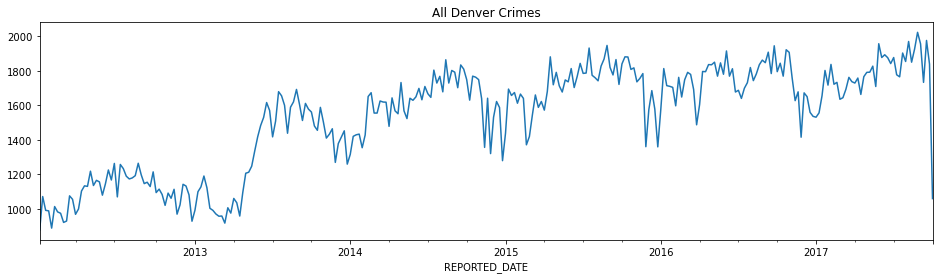

In [185]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 4))
weekly_crime.plot(title='All Denver Crimes', ax=ax)
fig.savefig('c12-crimes.png', dpi=300)

### Aggregating weekly crime and traffic accidents separately

In [190]:
crime = (pd.read_hdf('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/crime.h5', 'crime')
           .set_index('REPORTED_DATE')
           .sort_index()
        )

In [192]:
# Use the .resample method to group by each quarter
# of the year and then sum the IS_CRIME and 
# IS_TRAFFIC columns for each group:
(crime
 .resample('Q')
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
...,...,...
2016-09-30,17427,6199
2016-12-31,15984,6094
2017-03-31,16426,5587


Notice that the dates all appear as the last day of the quarter. This is because the
offset alias, Q, represents the end of the quarter. Let's use the offset alias QS to
represent the start of the quarter

In [193]:
(crime
 .resample('QS')
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442
...,...,...
2016-07-01,17427,6199
2016-10-01,15984,6094
2017-01-01,16426,5587


Let's verify these results by checking whether the second quarter of data is correct:

In [197]:
(crime
 .loc['2012-04-01': '2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']]
).sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [200]:
# It is possible to replicate this operation using
# the .groupby method:

(crime
 .groupby(pd.Grouper(freq='Q'))
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
...,...,...
2016-09-30,17427,6199
2016-12-31,15984,6094
2017-03-31,16426,5587


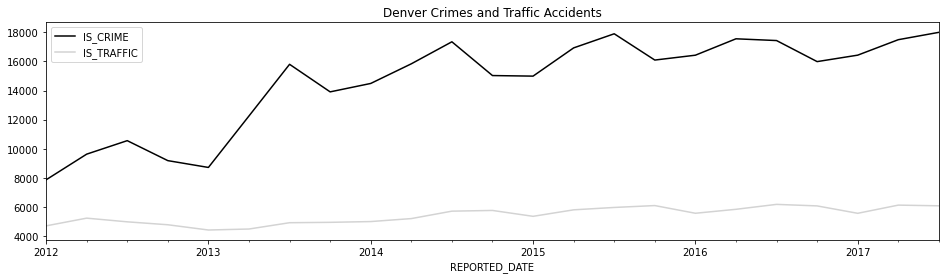

In [202]:
# Let's make a plot to visualize the trends in crime
# and traffic accidents over time:
fig, ax = plt.subplots(figsize=(16, 4))
(crime
 .groupby(pd.Grouper(freq='Q'))
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .plot(color=['black', 'lightgrey'], title='Denver Crimes and Traffic Accidents', ax=ax)
 
)
fig.savefig('c12-crime2.png', dpi=300)

After reading in and preparing our data in step 1, we begin grouping and aggregating in step
2. Immediately after calling the .resample method, we can continue either by chaining a
method or by selecting a group of columns to aggregate. We choose to select the IS_CRIME
and IS_TRAFFIC columns to aggregate. If we didn't select just these two, then all of the
numeric columns would have been summed with the following outcome:

In [203]:
(crime
 .resample('Q')
 .sum()
)

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006e+06,496960.237747,7882,4726
2012-06-30,-1.547274e+06,585656.789182,9641,5255
2012-09-30,-1.615835e+06,611604.800384,10566,5003
2012-12-31,-1.458177e+06,551923.040048,9197,4802
2013-03-31,-1.368931e+06,518159.721947,8730,4442
...,...,...,...,...
2016-09-30,-2.459343e+06,930926.400392,17427,6199
2016-12-31,-2.293628e+06,868233.856718,15984,6094
2017-03-31,-2.288383e+06,866234.222733,16426,5587


By default, the offset alias Q technically uses December 31st as the last day of the year. The
span of dates that represent a single quarter are all calculated using this ending date. The
aggregated result uses the last day of the quarter as its label. Step 3 uses the offset alias
QS, which, by default, calculates quarters using January 1st as the first day of the year.
Most public businesses report quarterly earnings but they do not all have the same calendar
year beginning in January. For instance, if we wanted our quarters to begin March 1st, then
we could use QS-MAR to anchor our offset alias:

In [207]:
(crime
 .groupby(pd.Grouper(freq='Q-MAR'))5
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum())

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
...,...,...
2016-09-30,17427,6199
2016-12-31,15984,6094
2017-03-31,16426,5587


In [212]:
(crime
 .resample('Q-MAR')
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
...,...,...
2016-09-30,17427,6199
2016-12-31,15984,6094
2017-03-31,16426,5587


To get a different visual perspective, we can plot the percentage increase in crime and traffic,
instead of the raw count. Let's divide all the data by the first row and plot again

In [210]:
crime_begin = (crime
               .resample('Q')
               [['IS_CRIME', 'IS_TRAFFIC']]
               .sum()
               .iloc[0]
              )

In [211]:
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

<AxesSubplot:title={'center':'Denver Crimes and Traffic Accidents % Increase'}, xlabel='REPORTED_DATE'>

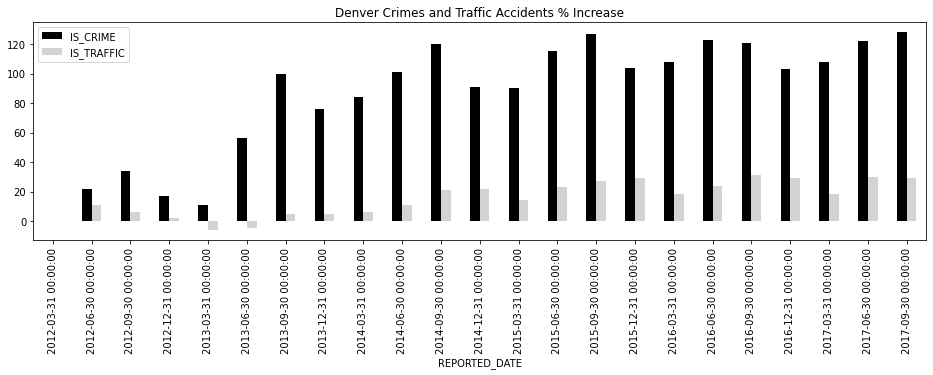

In [215]:
fig, ax = plt.subplots(figsize=(16, 4))
(crime
 .resample('Q')
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .div(crime_begin)
 .sub(1)
 .round(2)
 .mul(100)
 .plot.bar(color=['black', 'lightgrey'], ax=ax, 
       title='Denver Crimes and Traffic Accidents % Increase')
)

In [216]:
fig.autofmt_xdate()
fig.savefig('c12-crime3.png', dpi=300, bbox_inches='tight')

## Measuring Crime by weekday and year

Measuring crimes by weekday and by year simultaneously requires the functionality to pull
this information from a Timestamp. Thankfully, this functionality is built into any Timestamp
column with the .dt attribute.
In this recipe, we will use the .dt attribute to provide us with both the weekday name and
year of each crime as a Series. We count all of the crimes by forming groups using both of
these Series. Finally, we adjust the data to consider partial years and population before
creating a heatmap of the total amount of crime.

In [217]:
crime = pd.read_hdf('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/crime.h5', 'crime')

In [218]:
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,...,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,...,0,1
1,vehicular-eluding-no-chase,all-other-crimes,...,1,0
2,disturbing-the-peace,public-disorder,...,1,0
3,curfew,public-disorder,...,1,0
4,aggravated-assault,aggravated-assault,...,1,0
...,...,...,...,...,...
460906,burglary-business-by-force,burglary,...,1,0
460907,weapon-unlawful-discharge-of,all-other-crimes,...,1,0
460908,traf-habitual-offender,all-other-crimes,...,1,0
460909,criminal-mischief-other,public-disorder,...,1,0


All Timestamp columns have a special attribute, .dt, which gives access to a variety
of extra attributes and methods specifically designed for dates. Let's find the day
name of each REPORTED_DATE and then count these values

In [219]:
(crime
   ['REPORTED_DATE']
   .dt.day_name()
   .value_counts()
)

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

The weekends appear to have substantially less crime and traffic accidents. Let's put
this data in correct weekday order and make a horizontal bar plot:

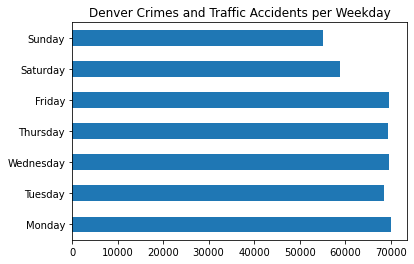

In [222]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'

fig, ax = plt.subplots(figsize=(6, 4))
                                
(crime
 ['REPORTED_DATE']
 .dt.day_name() \
 .value_counts() \
 .reindex(days) \
 .plot.barh(title=title, ax=ax)
 
 
)        
fig.savefig('c12-crime4.png', dpi=300, bbox_inches='tight')

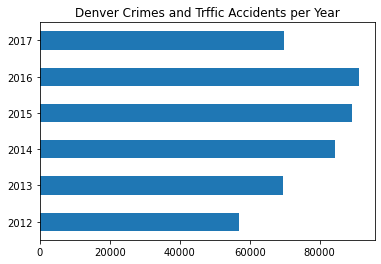

In [229]:
# We can do a very similar procedure to plot the 
# count by year:

title = 'Denver Crimes and Trffic Accidents per Year'
fig, ax = plt.subplots(figsize=(6, 4))

(crime
 ['REPORTED_DATE']
 .dt.year \
 .value_counts()
 .sort_index() \
 
 .plot.barh(title=title, ax=ax)
)
 
fig.savefig('c12-crime5.png', dpi=300, bbox_inches='tight')

We need to group by both weekday and year. One way of doing this is to use these
attributes in the .groupby method:

In [234]:
(crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
)

year  day      
2012  Friday        8549
      Monday        8786
      Saturday      7442
      Sunday        7189
      Thursday      8440
                   ...  
2017  Saturday      8514
      Sunday        8124
      Thursday     10545
      Tuesday      10628
      Wednesday    10576
Length: 42, dtype: int64

We have aggregated the data correctly, but the structure is not conducive to make
comparisons easily. Let's use the .unstack method to get a more readable table

In [238]:
(crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack(level=1)
)

day,Friday,Monday,...,Tuesday,Wednesday
year,,,,,
2012,8549,8786,...,8191,8440
2013,10380,10627,...,10416,10354
2014,12683,12813,...,12440,12948
2015,13273,13452,...,13381,13320
2016,14059,13708,...,13338,13900
2017,10677,10638,...,10628,10576


In [239]:
(crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
)

day,Friday,Monday,...,Tuesday,Wednesday
year,,,,,
2012,8549,8786,...,8191,8440
2013,10380,10627,...,10416,10354
2014,12683,12813,...,12440,12948
2015,13273,13452,...,13381,13320
2016,14059,13708,...,13338,13900
2017,10677,10638,...,10628,10576


We now have a nicer representation that is easier to read but noticeably, the 2017
numbers are incomplete. To help make a fairer comparison, we can make a linear
extrapolation to estimate the final number of crimes. Let's first find the last day that
we have data for in 2017:


In [240]:
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

A naive estimate would be to assume a constant rate of crime throughout the year
and multiply all values in the 2017 table by 365/272. However, we can do a little
better and look at our historical data and calculate the average percentage of crimes
that have taken place through the first 272 days of the year:

In [241]:
round(272/365, 3)

0.745

In [246]:
crime_pct = (crime
             ['REPORTED_DATE']
             .dt.dayofyear.le(272)
             .groupby(crime.REPORTED_DATE.dt.year)
             .mean()
             .mul(100)
             .round(2)
            )

In [247]:
crime_pct

REPORTED_DATE
2012     74.84
2013     72.54
2014     75.06
2015     74.81
2016     75.15
2017    100.00
Name: REPORTED_DATE, dtype: float64

In [254]:
crime_pct.loc[2012:2016].median()

74.84

It turns out (perhaps coincidentally) that the percentage of crimes that happen during
the first 272 days of the year is almost exactly proportional to the percentage of days
passed in the year. Let's now update the row for 2017 and change the column order
to match the weekday order:

In [255]:
def update_2017(df_):
    df_.loc[2017] = (df_
                    .loc[2017]
                    .div(.748)
                    .astype('int'))
    return df_

In [276]:
(crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'), 
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .pipe(update_2017)
 .reindex(columns=days)
)

day,Monday,Tuesday,...,Saturday,Sunday
year,,,,,
2012,8786,8191,...,7442,7189
2013,10627,10416,...,8875,8444
2014,12813,12440,...,10950,10278
2015,13452,13381,...,11586,10624
2016,13708,13338,...,11467,10554
2017,14221,14208,...,11382,10860


We could make a bar or line plot, but this is also a good situation for a heatmap,
which is in the seaborn library:

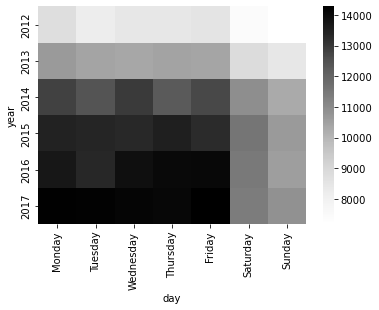

In [277]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
table = (crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'), 
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .pipe(update_2017)
 .reindex(columns=days)
)

sns.heatmap(table, cmap='Greys', ax=ax)
fig.savefig('c12-crime6.png', dpi=300, bbox_inches='tight')

Crime seems to be rising every year but this data does not account for rising
population. Let's read in a table for the Denver population for each year that we
have data:

In [278]:
denver_pop = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/denver_pop.csv', index_col='Year')

In [279]:
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


Many crime metrics are reported as rates per 100,000 residents. Let's divide the
population by 100,000 and then divide the raw crime counts by this number to get
the crime rate per 100,000 residents:

In [293]:
den_100k = denver_pop.div(100_000).squeeze()

normalized =  (crime
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'), 
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .pipe(update_2017)
 .reindex(columns=days)
 .div(den_100k, axis='index')
 .astype(int)
)

In [294]:
normalized

day,Monday,Tuesday,...,Saturday,Sunday
2012,1385,1291,...,1173,1133
2013,1642,1609,...,1371,1305
2014,1935,1879,...,1654,1552
2015,1978,1967,...,1703,1562
2016,1978,1924,...,1654,1522
2017,2017,2015,...,1614,1540


Once again, we can make a heatmap that, even after adjusting for population
increase, looks nearly identical to the first one:

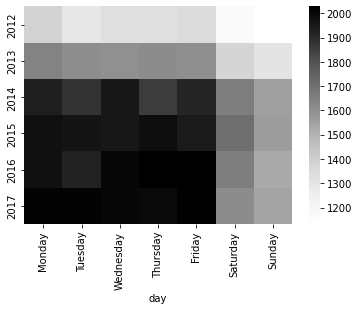

In [296]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(normalized, cmap='Greys', ax=ax)
fig.savefig('c12-crime7.png', dpi=300, bbox_inches='tight')

All DataFrame columns containing Timestamps have access to numerous other attributes and
methods with the .dt attribute. In fact, all of these methods and attributes available from the
.dt attribute are also available on a Timestamp object.

In [303]:
(crime
 ['REPORTED_DATE']
 .dt.day_name()
 .value_counts()
 .loc[days]
)

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

To ease the readability, we pivot the weekday level into horizontal column names with .unstack
in step 6. Step 6 is doing a cross tabulation. Here is another way to do this in pandas:

In [312]:
(crime
 .assign(year=crime['REPORTED_DATE'].dt.year,
        day=crime['REPORTED_DATE'].dt.day_name())
 .pipe(lambda df_: pd.crosstab(df_.year, df_.day))
 
)

day,Friday,Monday,...,Tuesday,Wednesday
year,,,,,
2012,8549,8786,...,8191,8440
2013,10380,10627,...,10416,10354
2014,12683,12813,...,12440,12948
2015,13273,13452,...,13381,13320
2016,14059,13708,...,13338,13900
2017,10677,10638,...,10628,10576


If we wanted to look at specific types of crimes we could do the following

In [313]:
crime_type = 'auto-theft'


In [314]:
normalized =  (crime
               .query('OFFENSE_CATEGORY_ID == @crime_type')
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'), 
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .pipe(update_2017)
 .reindex(columns=days)
 .div(den_100k, axis='index')
 .astype(int)
)

In [315]:
normalized

day,Monday,Tuesday,...,Saturday,Sunday
2012,95,72,...,78,76
2013,85,74,...,68,67
2014,94,76,...,67,67
2015,108,102,...,85,78
2016,119,102,...,86,85
2017,114,118,...,91,102


In [317]:
crime_type = 'traffic-accident'

normalized =  (crime
               .query('OFFENSE_CATEGORY_ID == @crime_type')
 .groupby([crime['REPORTED_DATE'].dt.year.rename('year'), 
          crime['REPORTED_DATE'].dt.day_name().rename('day')])
 .size()
 .unstack('day')
 .pipe(update_2017)
 .reindex(columns=days)
 .div(den_100k, axis='index')
 .astype(int)
)

normalized

day,Monday,Tuesday,...,Saturday,Sunday
2012,427,457,...,420,362
2013,407,451,...,362,302
2014,467,496,...,405,341
2015,489,514,...,425,342
2016,496,499,...,418,339
2017,503,506,...,376,320


### Grouping with anonymous functions with a DatetimeIndex

Read in the Denver crime hdf5 file, place the REPORTED_DATE column in the index,
and sort it:


In [322]:
crime = (pd.read_hdf('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/crime.h5', 'crime')
           .set_index('REPORTED_DATE')
           .sort_index()
        )

The DatetimeIndex has many of the same attributes and methods as a pandas
Timestamp. Let's take a look at some that they have in common:

In [323]:
common_attrs = (set(dir(crime.index)) & set(dir(pd.Timestamp)))

[attr for attr in common_attrs if attr[0] != '_']

['to_period',
 'hour',
 'minute',
 'freq',
 'microsecond',
 'to_pydatetime',
 'time',
 'timetz',
 'is_month_start',
 'quarter',
 'freqstr',
 'tz_convert',
 'ceil',
 'resolution',
 'month_name',
 'max',
 'days_in_month',
 'daysinmonth',
 'floor',
 'isocalendar',
 'day_of_week',
 'is_leap_year',
 'nanosecond',
 'week',
 'is_month_end',
 'is_year_end',
 'strftime',
 'dayofyear',
 'is_quarter_start',
 'round',
 'month',
 'day_of_year',
 'to_julian_date',
 'year',
 'is_year_start',
 'second',
 'dayofweek',
 'weekofyear',
 'tz',
 'to_numpy',
 'tz_localize',
 'date',
 'is_quarter_end',
 'day',
 'weekday',
 'min',
 'day_name',
 'normalize',
 'tzinfo']

We can then use the .index to find weekday names, similarly to what was done in
step 2 of the preceding recipe:

In [324]:
crime.index.day_name().value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

The .groupby method can accept a function as an argument. This function will be
passed the .index and the return value is used to form groups. Let's see this in
action by grouping with a function that turns the .index into a weekday name and
then counts the number of crimes and traffic accidents separately:

In [327]:
(crime
 .groupby(lambda idx: idx.day_name())
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


You can use a list of functions to group by both the hour of day and year, and then
reshape the table to make it more readable:

In [328]:
funcs = [lambda idx: idx.round('2h').hour, lambda idx: idx.year]

In [335]:
( crime
 .groupby(funcs)
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .unstack()
 #.swaplevel(axis=1)
)

IS_CRIME        ... IS_TRAFFIC      
REPORTED_DATE     2012  2013  ...       2016  2017
REPORTED_DATE                 ...                 
0                 2422  4040  ...        980   782
2                 1888  3214  ...        718   537
4                 1472  2181  ...        464   313
6                 1067  1365  ...        593   462
8                 2998  3445  ...       2372  1828
10                4305  5035  ...       2303  1873
12                4496  5524  ...       2760  1986
14                4266  5698  ...       2763  1990
16                4113  5889  ...       3527  2784
18                3660  5094  ...       3608  2718
20                3521  4895  ...       2184  1491
22                3078  4318  ...       1472  1072

[12 rows x 12 columns]

If you are using Jupyter, you can add .style.highlight_
max(color='lightgrey') to bring attention to the largest value in each column:

In [336]:
( crime
 .groupby(funcs)
 [['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .unstack()
 .style.highlight_max(color='lightgrey')
 #.swaplevel(axis=1)
)

## Grouping by a Timestamp and another column

Read in the employee dataset, and create a DatetimeIndex with the HIRE_DATE
column:

In [339]:
employee = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/Pandas Workbook/Pandas CookBook 1.x/Data files/employee.csv', parse_dates=['JOB_DATE', 'HIRE_DATE'], index_col='HIRE_DATE')
           

In [340]:
employee

,UNIQUE_ID,POSITION_TITLE,...,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),...,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,...,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,...,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,...,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,...,Active,1994-10-22
...,...,...,...,...,...
2014-06-09,1995,POLICE OFFICER,...,Active,2015-06-09
2003-09-02,1996,COMMUNICATIONS CAPTAIN,...,Active,2013-10-06
2014-10-13,1997,POLICE OFFICER,...,Active,2015-10-13


Let's first do a grouping by just gender, and find the average salary for each:

In [345]:
(employee
 .groupby('GENDER')
 ['BASE_SALARY']
 .mean()
 .round(-2)
)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

Let's find the average salary based on hire date, and group everyone into 10-year
buckets:

In [346]:
(employee
 .resample('10AS')
 ['BASE_SALARY']
 .mean()
 .round(-2)
)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

If we wanted to group by both gender and a ten-year time span, we can call
.resample after calling .groupby:

In [349]:
(employee
 .groupby('GENDER')
 .resample('10AS')
 [['BASE_SALARY']]
 .mean()
 .round(-2)
)

BASE_SALARY
GENDER HIRE_DATE              
Female 1975-01-01      51600.0
       1985-01-01      57600.0
       1995-01-01      55500.0
       2005-01-01      51700.0
       2015-01-01      38600.0
Male   1958-01-01      81200.0
       1968-01-01     106500.0
       1978-01-01      72300.0
       1988-01-01      64600.0
       1998-01-01      59700.0
       2008-01-01      47200.0

Now, this does what we set out to do, but we run into a slight issue whenever we want
to compare female to male salaries. Let's .unstack the gender level and see what
happens:

In [352]:
(employee
 .groupby('GENDER')
 .resample('10AS')
 ['BASE_SALARY']
 .mean()
 .round(-2)
 .unstack('GENDER')
)

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
1978-01-01,NaN,72300.0
1985-01-01,57600.0,NaN
1988-01-01,NaN,64600.0
1995-01-01,55500.0,NaN
1998-01-01,NaN,59700.0
2005-01-01,51700.0,NaN


The 10-year periods for males and females do not begin on the same date. This
happened because the data was first grouped by gender and then, within each
gender, more groups were formed based on hire dates. Let's verify that the first hired
male was in 1958 and the first hired female was in 1975:

In [353]:
employee[employee['GENDER'] == 'Male'].index.min()

Timestamp('1958-12-29 00:00:00')

In [355]:
employee[employee['GENDER'] == 'Female'].index.min()

Timestamp('1975-06-09 00:00:00')

To resolve this issue, we must group the date together with the gender, and this is
only possible with the .groupby method:

In [361]:
(employee
 .groupby(['GENDER', pd.Grouper(freq='10AS')])
 ['BASE_SALARY']
 .mean()
 .round(-2)
 #.unstack('GENDER')
)

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

Now we can .unstack the gender and get our rows aligned perfectly

In [362]:
(employee
 .groupby(['GENDER', pd.Grouper(freq='10AS')])
 ['BASE_SALARY']
 .mean()
 .round(-2)
 .unstack('GENDER')
)

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


There is a completely different way to do this recipe. We can use the cut function to
create equal-width intervals based on the year that each employee was hired and form
groups from it:

In [368]:
cuts = pd.cut(employee.index.year, bins=5, precision=0)

cuts.categories.values

<IntervalArray>
[(1958.0, 1970.0], (1970.0, 1981.0], (1981.0, 1993.0], (1993.0, 2004.0], (2004.0, 2016.0]]
Length: 5, dtype: interval[float64, right]

In [374]:
(employee
 .groupby([cuts, 'GENDER'])
 ["BASE_SALARY"]
 .mean()
 .unstack('GENDER')
 .round(-2)
)

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0
